In [5]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [3]:
import pandas as pd 
import numpy as np

In [22]:
import os
import math
from ast import literal_eval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

from SSMuLA.fitness_process_vis import parse_lib_stat
from SSMuLA.de_simulations import DE_COLORS, DE_TYPES, DE_LEGEND_MAP
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE, LIB_COLORS
from SSMuLA.alde_analysis import avg_alde_df
from SSMuLA.mlde_analysis import get_mlde_avg_df, get_mlde_avg_sdf
from SSMuLA.zs_analysis import (
    ZS_OPTS,
    ZS_COMB_OPTS,
    ZS_OPTS_LEGEND,
)
from SSMuLA.landscape_global import LIB_INFO_DICT, N_SAMPLE_LIST, TOTAL_N_LIST

%matplotlib inline

In [10]:
lib_stat = parse_lib_stat(
    lib_csv_path="results/fitness_distribution/max/all_lib_stats.csv", n_mut_cuttoff=0
)
active_cutoff = 1
active_lib_list = lib_stat[(lib_stat["percent_active"]>=active_cutoff)]["lib"].tolist() # & (lib_stat["percent_measured"]>90)
active_lib_list

['DHFR',
 'ParD2',
 'ParD3',
 'GB1',
 'T7',
 'TEV',
 'TrpB3D',
 'TrpB3E',
 'TrpB3F',
 'TrpB3G',
 'TrpB3I',
 'TrpB4']

In [49]:

old_mlde_all = pd.read_csv("results/mlde/vis_5/all_df.csv")
old_mlde_all.encoding.unique()

array(['one-hot', 'esm2_t33_650M_UR50D-flatten_site',
       'esm2_t33_650M_UR50D-mean_all', 'esm2_t33_650M_UR50D-mean_site'],
      dtype=object)

In [29]:
# test if emb > oh
mlde_all = pd.read_csv("results/mlde/all_df_comb_onehot_4.csv")

In [53]:
emd_mlde = pd.read_csv("results/mlde_emb/vis/all_df.csv")

In [54]:
mlde = pd.concat(
    [
        mlde_all[
            (mlde_all["n_mut_cutoff"] == "all")
            & (mlde_all["zs"] == "none")
            & (mlde_all["n_top"] == 96)
        ],
        old_mlde_all[
            (old_mlde_all["n_mut_cutoff"] == "all")
            & (old_mlde_all["zs"] == "none")
            & (old_mlde_all["n_top"] == 96)
            & (old_mlde_all["encoding"] != "one-hot")
        ],
        emd_mlde[
            (emd_mlde["zs"] == "none")
            & (emd_mlde["n_top"] == 96)
            & (emd_mlde["n_mut_cutoff"] == "all")
        ],
    ]
)
mlde

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
845800,one-hot,boosting,24,8000,0,0.267066,0.139139,0.865538,0.515047,0.904171,0.318921,0.0,432.0,all,DHFR,none,96,max
845801,one-hot,boosting,24,8000,1,0.180532,0.130917,0.996537,0.400253,0.807204,0.256821,0.0,191.0,all,DHFR,none,96,max
845802,one-hot,boosting,24,8000,2,0.258320,0.134396,0.960769,0.300621,0.775122,0.178083,0.0,361.0,all,DHFR,none,96,max
845803,one-hot,boosting,24,8000,3,0.740868,0.158299,0.847249,0.564689,0.887130,0.284650,0.0,1039.0,all,DHFR,none,96,max
845804,one-hot,boosting,24,8000,4,0.186233,0.130543,0.741961,0.282581,0.774673,0.218281,0.0,360.0,all,DHFR,none,96,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534595,esm2_t33_650M_UR50D-mean_site,ridge,1920,159129,45,0.188912,0.020619,0.800478,0.466590,0.986214,0.273096,0.0,416.0,all,TrpB4,none,96,max
534596,esm2_t33_650M_UR50D-mean_site,ridge,1920,159129,46,0.170227,0.019001,0.688532,0.422841,0.987210,0.264410,0.0,5840.0,all,TrpB4,none,96,max
534597,esm2_t33_650M_UR50D-mean_site,ridge,1920,159129,47,0.197283,0.021621,0.922559,0.531315,0.988216,0.251197,0.0,1020.0,all,TrpB4,none,96,max
534598,esm2_t33_650M_UR50D-mean_site,ridge,1920,159129,48,0.202278,0.022021,0.922559,0.461698,0.986600,0.267240,0.0,170.0,all,TrpB4,none,96,max


In [39]:
encoding_style = {
    'one-hot': "solid",
    'esm2_t33_650M_UR50D-flatten_site': "dashed",
    'esm2_t33_650M_UR50D-mean_all': "dashdot",
    'esm2_t33_650M_UR50D-mean_site': "dotted"
}

In [40]:
encoding_des = {
    'one-hot': "One-hot",
    'esm2_t33_650M_UR50D-flatten_site': "ESM2 flatten over mutation sites",
    'esm2_t33_650M_UR50D-mean_site': "ESM2 mean pooling over sites",
    'esm2_t33_650M_UR50D-mean_all': "ESM2 mean pooling over full sequence",
}

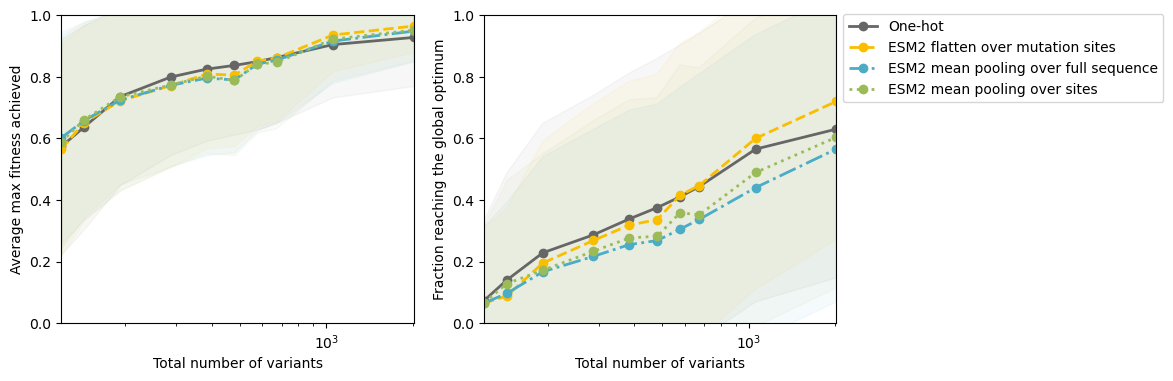

In [55]:

# for avg cross number of samples
n_top = 96
# n_corr = 384

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
mlde_color_list = ["gray", "yellow", "blue", "green"]

for ax, mlde_metric, de_metric, y_label in zip(
    axes,
    ["top_maxes", "if_truemaxs"],
    ["mean_all", "fraction_max"],
    ["Average max fitness achieved", "Fraction reaching the global optimum"],
):

    for i, (emb_opt, ls) in enumerate(encoding_style.items()):
        mlde_df = get_mlde_avg_sdf(
            mlde, n_top, n_mut_cutoff="all", zs="none", encoding_list=[emb_opt], active_lib_list=active_lib_list
        )
        
        ax.plot(
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"],
            marker="o",
            linestyle=ls,
            linewidth=2,
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
            label=encoding_des[emb_opt]
        )
        ax.fill_between(
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
            mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
            alpha=0.05,
        )

    # # add vline
    # ax.axvline(
    #     n_corr,
    #     color="gray",
    #     linewidth=0.5,
    #     linestyle="dotted"
    # )
    ax.set_xlim(TOTAL_N_LIST[0], TOTAL_N_LIST[-1])
    ax.set_ylim(0, 1.0)

    ax.set_xscale("log")
    ax.set_xlabel("Total number of variants")
    ax.set_ylabel(y_label)


    if ax == axes[1]:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1.025))

# fig.suptitle(
#     "One-hot vs Eembedding Performance Across 10 Landscapes", fontsize=12, fontweight="bold", y=0.95
# )

Text(0.5, 0.95, 'One-hot vs Eembedding Performance Across 10 Landscapes')

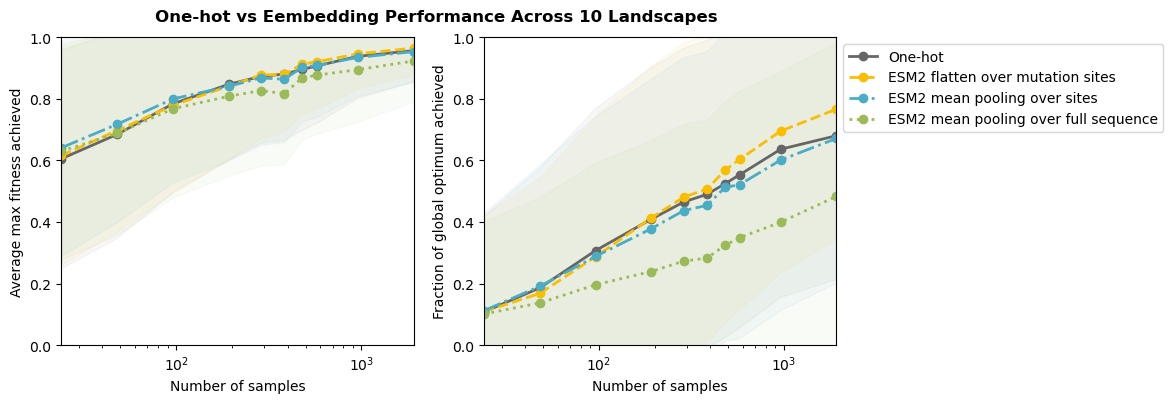

In [55]:

# for avg cross number of samples
n_top = 96
# n_corr = 384

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
mlde_color_list = ["gray", "yellow", "blue", "green"]

for ax, mlde_metric, de_metric, y_label in zip(
    axes,
    ["top_maxes", "if_truemaxs"],
    ["mean_all", "fraction_max"],
    ["Average max fitness", "Fraction of global optimum"],
):

    for i, (emb_opt, ls) in enumerate(encoding_style.items()):
        mlde_df = get_mlde_avg_sdf(
            mlde, n_top, n_mut_cutoff="all", zs=["none"], emb=emb_opt, active_lib_list=active_lib_list
        )
        
        ax.plot(
            mlde_df.index,
            mlde_df[f"{mlde_metric}_mean"],
            marker="o",
            linestyle=ls,
            linewidth=2,
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
            label=encoding_des[emb_opt]
        )
        ax.fill_between(
            mlde_df.index,
            mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
            mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
            alpha=0.05,
        )

    # # add vline
    # ax.axvline(
    #     n_corr,
    #     color="gray",
    #     linewidth=0.5,
    #     linestyle="dotted"
    # )

    ax.set_xlim(N_SAMPLE_LIST[0], N_SAMPLE_LIST[-1])
    ax.set_ylim(0, 1.0)

    ax.set_xscale("log")
    ax.set_xlabel("Number of samples")
    ax.set_ylabel(f"{y_label} achieved")

    if ax == axes[1]:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

fig.suptitle(
    "One-hot vs Eembedding Performance Across 10 Landscapes", fontsize=12, fontweight="bold", y=0.95
)